
### Salary Prediction
Predict the salary if the employee using the features provided in the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

### Data Collection

In [104]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [105]:
df.shape

(397, 6)

In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
for i in df.columns:
    print('{} : {}'.format(i,df[i].unique()))

rank : ['Prof' 'AsstProf' 'AssocProf']
discipline : ['B' 'A']
yrs.since.phd : [19 20  4 45 40  6 30 21 18 12  7  1  2 38 37 39 31 36 34 24 13 35  5 11
 22 41  9 23 25 28 16 14 10  8  3 33 17 29 26 43 15 42 32 54 56 27 48 46
 47 52 51 49 44]
yrs.service : [18 16  3 39 41  6 23 45 20  8  2  1  0 34 36 26 31 30 19  4  9 21 27 38
 15 28 25 11  5 12 17 14 37  7 10 29 32 22 49 57 24 53 33 40 35 43 44 48
 46 51 13 60]
sex : ['Male' 'Female']
salary : [139750 173200  79750 115000 141500  97000 175000 147765 119250 129000
 119800  79800  77700  78000 104800 117150 101000 103450 124750 137000
  89565 102580  93904 113068  74830 106294 134885  82379  77000 118223
 132261  79916 117256  80225 155750  86373 125196 100938 146500  93418
 101299 231545  94384 114778  98193 151768 140096  70768 126621 108875
  74692 106639 103760  83900 117704  90215 100135  75044  90304  75243
 109785 103613  68404 100522  99418 111512  91412 126320 146856 100131
  92391 113398  73266 150480 193000  86100  84240 15074

<AxesSubplot:>

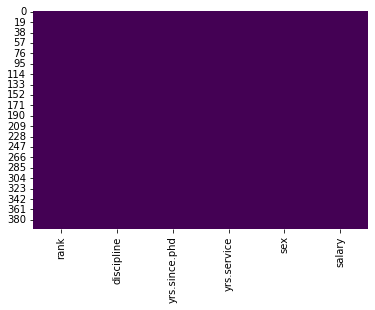

In [9]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

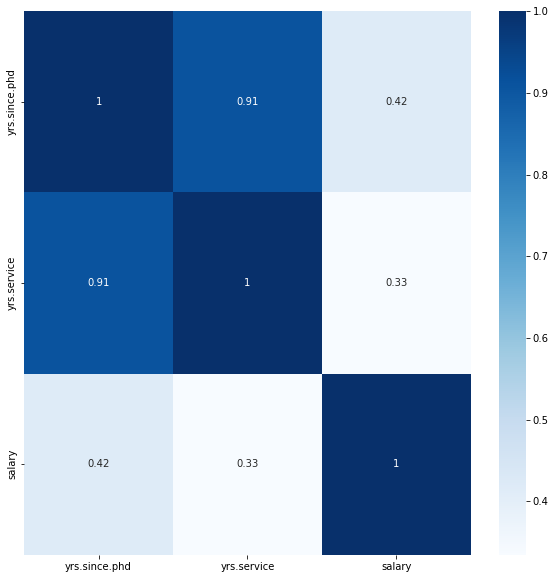

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

All the features are of positive corelation

In [111]:
df.select_dtypes(include=['object']).columns

Index(['rank', 'discipline', 'sex'], dtype='object')

In [112]:
cat =['rank', 'discipline', 'sex']

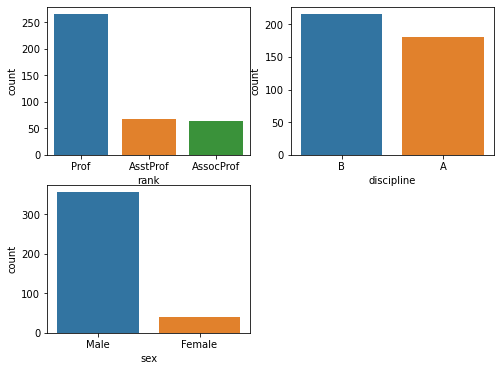

In [120]:
count=1
plt.subplots(figsize=(8, 6))
for i in cat:
    plt.subplot(2,2,count)
    sns.countplot(df[i])
    count+=1

plt.show()

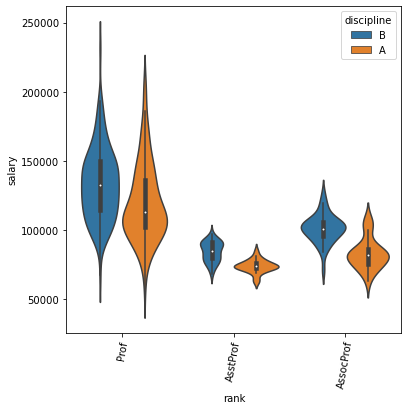

In [27]:
plt.figure(figsize=(6,6))
sns.violinplot(x="rank", y="salary", data=df,hue='discipline',style='sex',s=200)
plt.xticks(rotation=80)
plt.show()

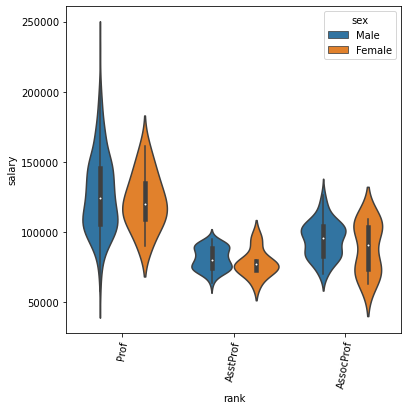

In [121]:
plt.figure(figsize=(6,6))
sns.violinplot(x="rank", y="salary", data=df,hue='sex',style='discipline',s=200)
plt.xticks(rotation=80)
plt.show()

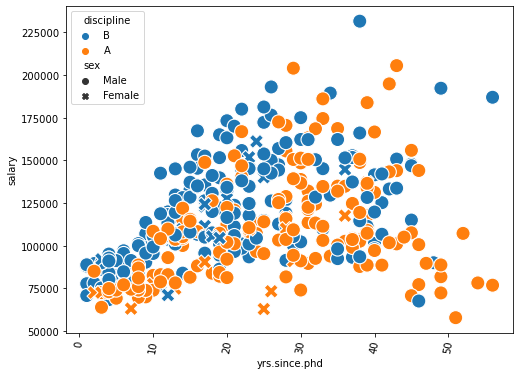

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="yrs.since.phd", y="salary", data=df,hue='discipline',style='sex',s=200)
plt.xticks(rotation=80)
plt.show()

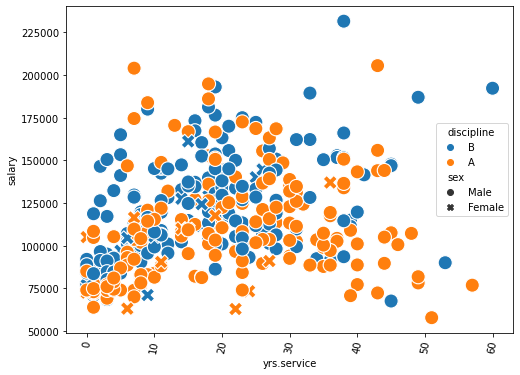

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="yrs.service", y="salary", data=df,hue='discipline',style='sex',s=200)
plt.xticks(rotation=80)
plt.show()

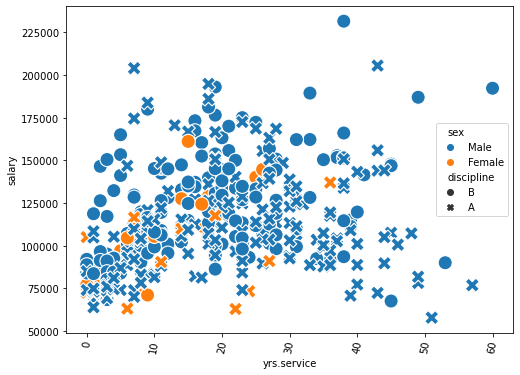

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="yrs.service", y="salary", data=df,hue='sex',style='discipline',s=200)
plt.xticks(rotation=80)
plt.show()

In [43]:
columns = ['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

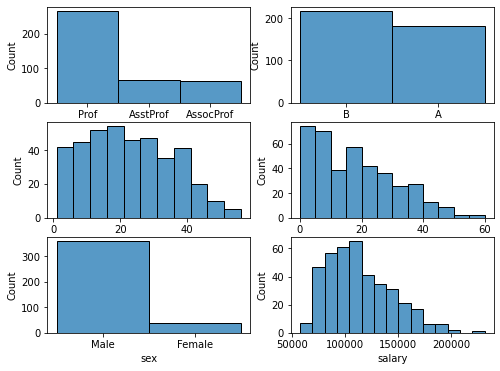

In [47]:
count=1
plt.subplots(figsize=(8, 6))
for i in columns:
    plt.subplot(3,2,count)
    sns.histplot(df[i])
    count+=1

plt.show()

In [131]:
lab = LabelEncoder()
for i in columns:
    df[i] = lab.fit_transform(df[i])

print(df.dtypes)

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object


In [132]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.526734,0.454607,0.132492,0.566184
discipline,-0.086266,1.000000,-0.218166,-0.165946,0.003724,0.166957
yrs.since.phd,0.526734,-0.218166,1.000000,0.910380,0.148850,0.430239
yrs.service,0.454607,-0.165946,0.910380,1.000000,0.154191,0.354403
sex,0.132492,0.003724,0.148850,0.154191,1.000000,0.130714
salary,0.566184,0.166957,0.430239,0.354403,0.130714,1.000000


<AxesSubplot:>

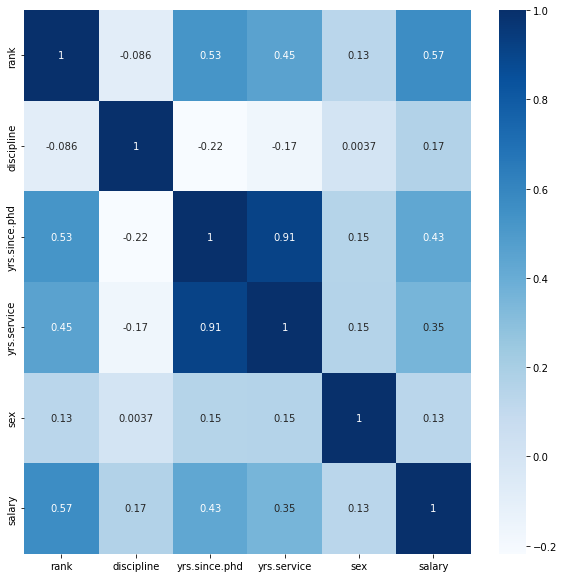

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [57]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.275948
yrs.service      0.552780
sex             -2.709958
salary           0.080231
dtype: float64

In [58]:
for i in columns :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [59]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.275948
yrs.service      0.552780
sex             -2.709958
salary           0.080231
dtype: float64

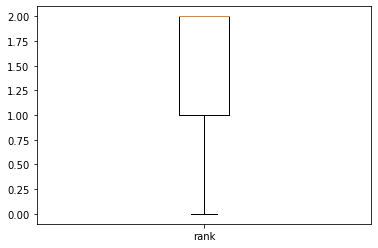

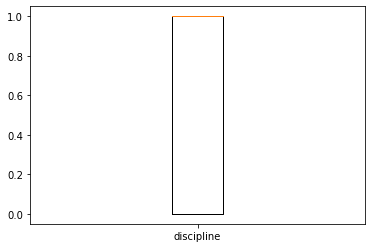

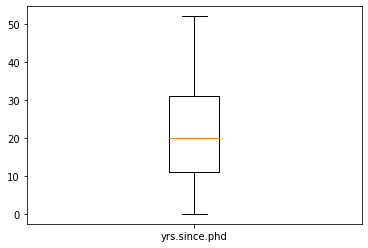

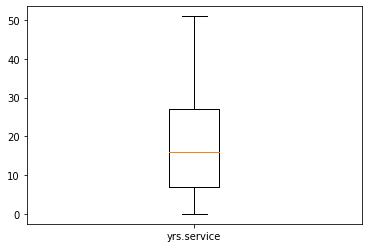

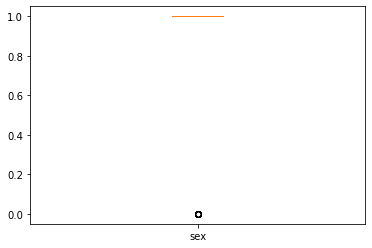

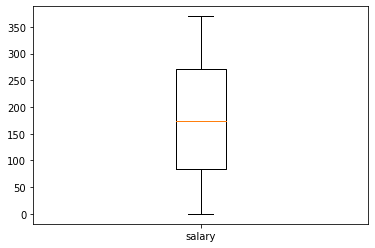

In [60]:
for i in columns:
    plt.boxplot(df[i], labels = [i])
    plt.show()

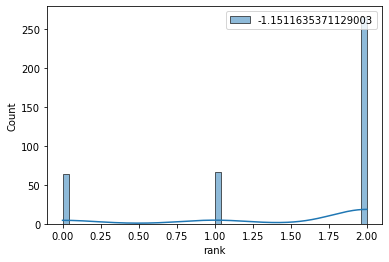

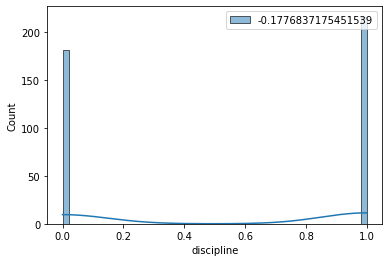

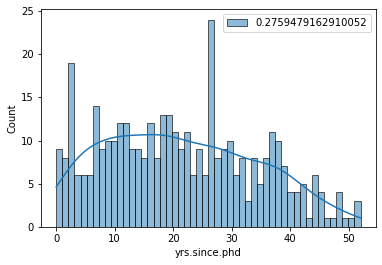

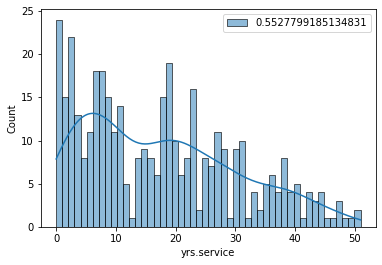

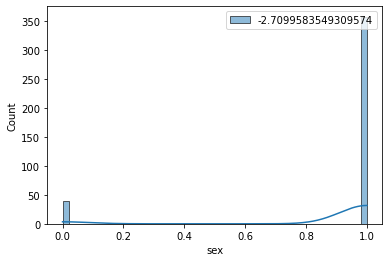

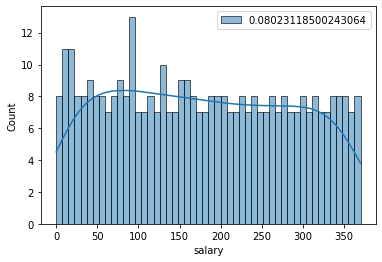

In [61]:
for i in columns:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [62]:
for i in columns:
    Q1,Q3 = np.percentile(df[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[i] < lower_range) | (df[i] > upper_range)]

In [63]:
df_no_outliers

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [65]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 396, 396, 396], dtype=int64), array([0, 1, 2, ..., 3, 4, 5], dtype=int64))
(397, 6)


In [66]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(358, 6)

In [67]:
df.shape

(397, 6)

In [83]:
X = df_new.drop(['salary'],axis=1)
y = df_new['salary']

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [86]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.21411058722677523
R2 score for the random state is 42 is 0.43762904319106444
R2 score for the random state is 42 is 0.41989023099363276
R2 score for the random state is 42 is 0.14498904101306032
R2 score for the random state is 42 is 0.44888419035144356
R2 score for the random state is 42 is 0.3650403784456362
R2 score for the random state is 42 is 0.4339009096215283
R2 score for the random state is 43 is 0.41940922193221364
R2 score for the random state is 43 is 0.4359848896402071
R2 score for the random state is 43 is 0.5071372603925501
R2 score for the random state is 43 is 0.07837628196538271
R2 score for the random state is 43 is 0.48665901226426356
R2 score for the random state is 43 is 0.33132911039184665
R2 score for the random state is 43 is 0.3880687123826384
R2 score for the random state is 44 is 0.3706099547909064
R2 score for the random state is 44 is 0.414863972588984
R2 score for the random state is 44 is 0.45175445031837436
R2 sc

In [87]:
KNR = KNeighborsRegressor()
KNR.fit(X_train,y_train)
pred = KNR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 55.53551916641578


In [88]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  54.132773109243686
Mean squared Error:  5206.468235294118
Root Mean Absolute Error:  7.357497747824574


Text(0, 0.5, 'Predicted_Y')

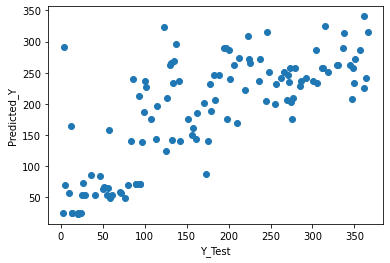

In [89]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [93]:
ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 49.95140511599553


<AxesSubplot:>

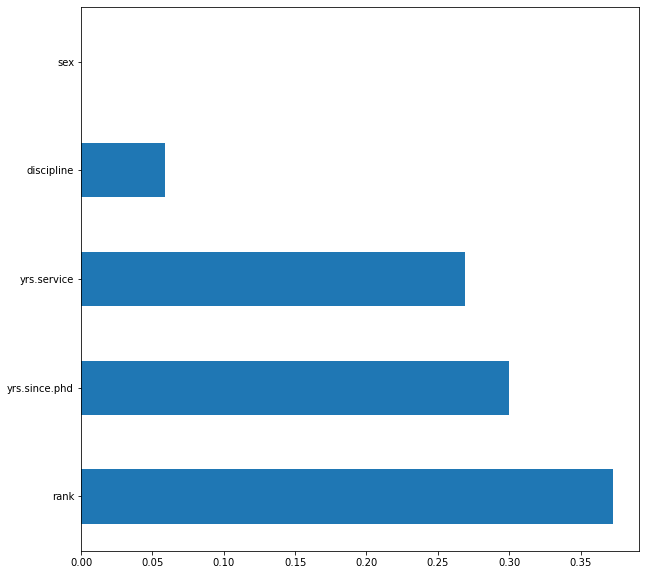

In [94]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(ETR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(70).plot(kind='barh')

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [78]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.01680672268907563
accuracy score correspond to random state  40 is 0.008403361344537815
accuracy score correspond to random state  41 is 0.0
accuracy score correspond to random state  41 is 0.0
accuracy score correspond to random state  42 is 0.008403361344537815
accuracy score correspond to random state  42 is 0.0
accuracy score correspond to random state  43 is 0.008403361344537815
accuracy score correspond to random state  43 is 0.0
accuracy score correspond to random state  44 is 0.01680672268907563
accuracy score correspond to random state  44 is 0.008403361344537815
accuracy score correspond to random state  45 is 0.025210084033613446
accuracy score correspond to random state  45 is 0.008403361344537815
accuracy score correspond to random state  46 is 0.008403361344537815
accuracy score correspond to random state  46 is 0.008403361344537815
accuracy score correspond to random state  47 is 0.0
accuracy score correspond to random s

### Pipeline

### Pipeline with 3 features

In [97]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=3)),
                     ('lr_regressor',LinearRegression())])

In [98]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',RandomForestRegressor())])

In [99]:
pipeline_kn=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',KNeighborsRegressor())])

In [100]:
pipelines = [pipeline_lr, pipeline_dt,pipeline_kn]

In [101]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [102]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest',2:'KNeighborsRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [103]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 57.72775678249694


### Conclusion
• Import the Salary Prediction dataset

• It contains 397 rows and 6 columns

• Out of these 3 features were categorical and remaining features were continous

• From the plots, we can come to the following conclusion: • HS-Grads are more

    •    Salary is mostly based on the rank, of the order (Prof,Assoc Prof,Asst prof)

    •    From the count plot,we find that most of them are professors,with discipline A and are male.

    •    Discipline B gets more salary,female staff are paid less
    
    •    Regarding No of years after phd, staff get rise in salary upto 30 years and then decreases
    
    •    Regarding No of years service, staff get rise in salary upto 20 years and then decreases
    
• From the heatmap, we find that features are not highly corelated when compared to others

• Categories features are converted to continuous features by using Label encoding

• If skewness is more than 0.55 it is transformed logarithmically

• If outliers are present, it is used by IQR proximity and Z-score method

The model is evaluated by using regression

•    Of the regression algorithms:

•    KNeighborsRegressor of random state 57 give more accuracy


•    From this we get the best parameters, final R2 Score : 55.53.

        1. Mean Absolute Error:  54.132773109243686
        2. Mean squared Error:  5206.468235294118
        3. Root Mean Absolute Error:  7.357497747824574

Thus, we conclude that KNeighborsRegressor algorithm gives the maximum accuracy of 49% and the attribution of the Salary  can be predicted by this algorithm